## Problem statement :-

In 2018, the firm launched a new investment product, “Term Deposit”, which has observed a rapid growth since its inception. The increase in term deposit accounts has provided the firm with additional funds to create other offerings. Hence, based on this performance, it further wants to increase its term deposit accounts amongst existing customers. In order to do so, the firm plans to run a campaign and wants EXL to identify a list of customers who could be contacted via telecommunication channels to open a term deposit account with ABC. Since the campaign will be run for a short period of time, and owing to budget constraints, the firm wants a list of only 1000 customers from EXL for the target list

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Import train data

In [4]:
data = pd.read_excel("Historical_data.xlsx")
data.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [5]:
data.tail()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
23875,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,993,2.0,3,other,0
23876,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,855,7.0,0,unknown,0
23877,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,883,2.0,0,unknown,0
23878,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,803,6.0,0,unknown,0
23879,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,796,10.0,0,unknown,0


## Data Description 

In [6]:
pd.read_excel("Data_Dictionary.xlsx")

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


## Import test data

In [7]:
test = pd.read_excel("New_customer_list_data.xlsx")
test.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'last_contact_duration', 'day_of_month', 'month',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome'],
      dtype='object')

In [8]:
test.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


## Size of train data set

In [9]:
data.shape

(23880, 17)

There are 23880 no. of rows and 17 no. of columns in train data set.

## Data types of features in train dataset

In [10]:
data.dtypes

customer_id                    object
customer_age                  float64
job_type                       object
marital                        object
education                      object
default                        object
balance                       float64
housing_loan                   object
personal_loan                  object
communication_type             object
day_of_month                    int64
month                          object
last_contact_duration           int64
num_contacts_in_campaign      float64
num_contacts_prev_campaign      int64
prev_campaign_outcome          object
term_deposit_subscribed         int64
dtype: object

## Check Null values in train dataset

In [11]:
data.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

customer_age , marital , housing_loan , personal_loan , num_contacts_in_campaign columns contain null values.

## Number of unique counts

In [12]:
def unique(df , column):
    print("Number of unique counts in ",column," : ",df[column].nunique(), " out of rows : ",df.shape[0])

In [13]:
for i in data.columns :
    unique(data,i)

Number of unique counts in  customer_id  :  23880  out of rows :  23880
Number of unique counts in  customer_age  :  75  out of rows :  23880
Number of unique counts in  job_type  :  12  out of rows :  23880
Number of unique counts in  marital  :  3  out of rows :  23880
Number of unique counts in  education  :  4  out of rows :  23880
Number of unique counts in  default  :  2  out of rows :  23880
Number of unique counts in  balance  :  5811  out of rows :  23880
Number of unique counts in  housing_loan  :  2  out of rows :  23880
Number of unique counts in  personal_loan  :  2  out of rows :  23880
Number of unique counts in  communication_type  :  3  out of rows :  23880
Number of unique counts in  day_of_month  :  31  out of rows :  23880
Number of unique counts in  month  :  12  out of rows :  23880
Number of unique counts in  last_contact_duration  :  312  out of rows :  23880
Number of unique counts in  num_contacts_in_campaign  :  44  out of rows :  23880
Number of unique count

## Statistical Description of features in train dataset

In [14]:
data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [15]:
data.describe(include = ['O'])

,customer_id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,23880,23880,23773,23880,23880,23880,23767,23880,23880,23880
unique,23880,12,3,4,2,2,2,3,12,4
top,id_8499,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,5167,14271,12330,23452,13369,20001,15486,7331,19513


## Graphical EDA

##### 1) Count plot for "term_deposit_subscribed"  feature

In [16]:
data.groupby("term_deposit_subscribed").count()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
term_deposit_subscribed,,,,,,,,,,,,,,,,
0,21344,20914,21344,21245,21344,21344,21088,21344,21245,21344,21344,21344,21344,21258,21344,21344
1,2536,2489,2536,2528,2536,2536,2515,2536,2522,2536,2536,2536,2536,2526,2536,2536


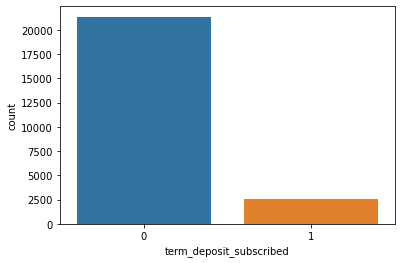

In [17]:
sns.countplot(x = "term_deposit_subscribed",data = data)

In [18]:
data["term_deposit_subscribed"].value_counts()

0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64

##### Observation :- As we see our target feature "term_deposit_subscribed" is biased towards value 0.

##### 2) Countplot for "term_deposit_subscribed" under "marital" feature

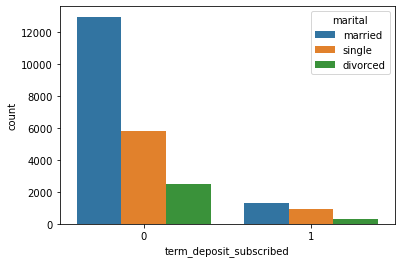

In [19]:
sns.countplot(x = "term_deposit_subscribed",hue = "marital",data = data)

In [20]:
data.groupby(["term_deposit_subscribed","marital"]).count()

customer_id  customer_age  job_type  \
term_deposit_subscribed marital                                         
0                       divorced         2503          2451      2503   
                        married         12951         12696     12951   
                        single           5791          5672      5791   
1                       divorced          292           289       292   
                        married          1320          1294      1320   
                        single            916           898       916   

                                  education  default  balance  housing_loan  \
term_deposit_subscribed marital                                               
0                       divorced       2503     2503     2476          2503   
                        married       12951    12951    12789         12951   
                        single         5791     5791     5728          5791   
1                       divorced        292      292      291           292   
                        married        1320     1320     1309          1320   
                        single          916      916      907           916   

                                  personal_loan  communication_type  \
term_deposit_subscribed marital                                       
0                       divorced           2492                2503   
                        married           12888               12951   
                        single             5766                5791   
1                       divorced            290                 292   
                        married            1314                1320   
                        single              910                 916   

                                  day_of_month  month  last_contact_duration  \
term_deposit_subscribed marital                                                
0                       divorced          2503   2503                   2503   
                        married          12951  12951                  12951   
                        single            5791   5791                   5791   
1                       divorced           292    292                    292   
                        married           1320   1320                   1320   
                        single             916    916                    916   

                                  num_contacts_in_campaign  \
term_deposit_subscribed marital                              
0                       divorced                      2495   
                        married                      12889   
                        single                        5775   
1                       divorced                       290   
                        married                       1313   
                        single                         915   

                                  num_contacts_prev_campaign  \
term_deposit_subscribed marital                                
0                       divorced                        2503   
                        married                        12951   
                        single                          5791   
1                       divorced                         292   
                        married                         1320   
                        single                           916   

                                  prev_campaign_outcome  
term_deposit_subscribed marital                          
0                       divorced                   2503  
                        married                   12951  
                        single                     5791  
1                       divorced                    292  
                        married                    1320  
                        single                      916

###### Observation :- As we see "married" people play important role in "term_deposit_subscribed"

#### 3) Countplot for "term_deposit_subscribed" under "education" feature

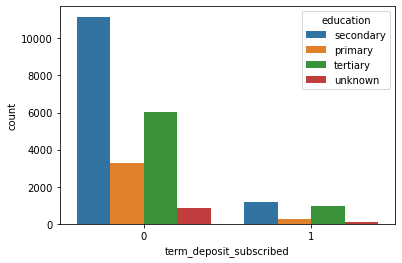

In [21]:
sns.countplot(x = "term_deposit_subscribed",hue = "education",data = data)

In [22]:
data["education"].value_counts()

secondary    12330
tertiary      6993
primary       3571
unknown        986
Name: education, dtype: int64

##### Observation :- As we see secondary education peoples play important role in "term_deposit_subscribed".

#### 4) Distplot for all numerical feature in train dataset

In [23]:
col = [col for col in data.columns if data[col].dtype != 'O']
col

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'term_deposit_subscribed']

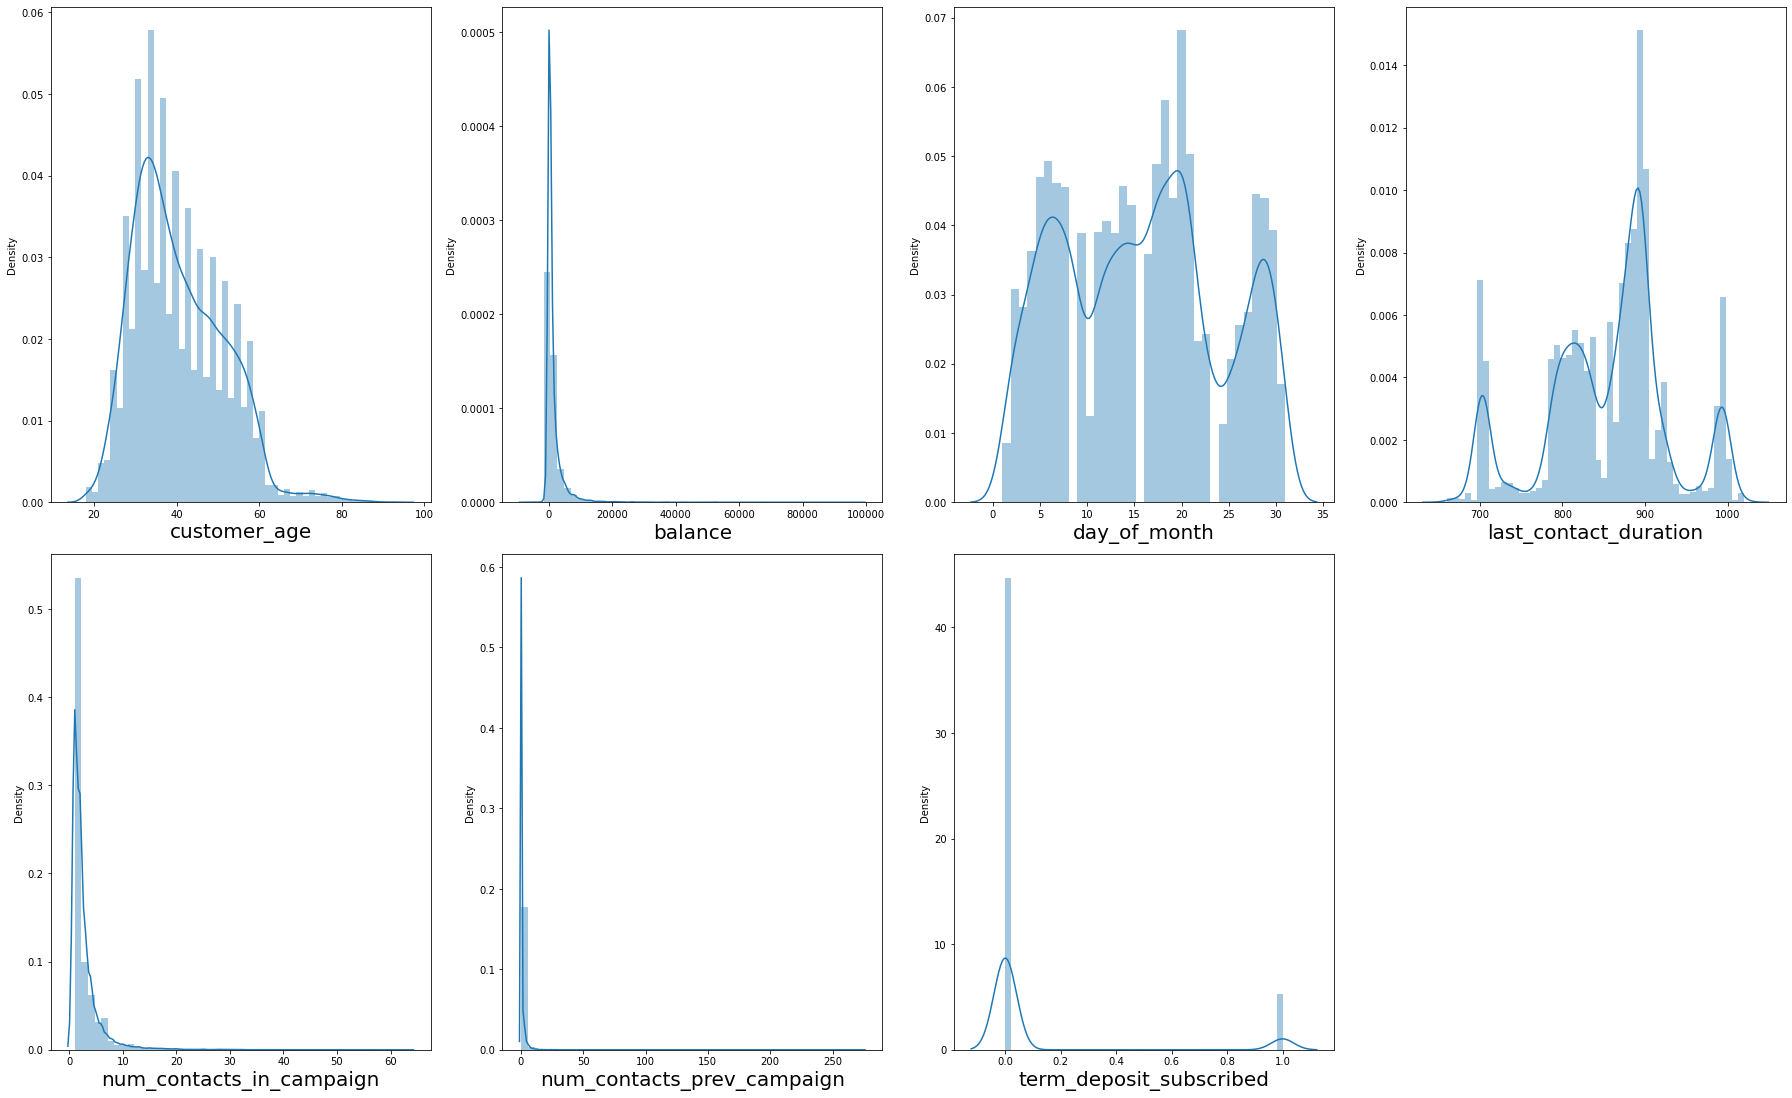

In [24]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in col:
    if plotnumber<=7 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 5) Scatter plot between "term_deposit_subscribed" and other features

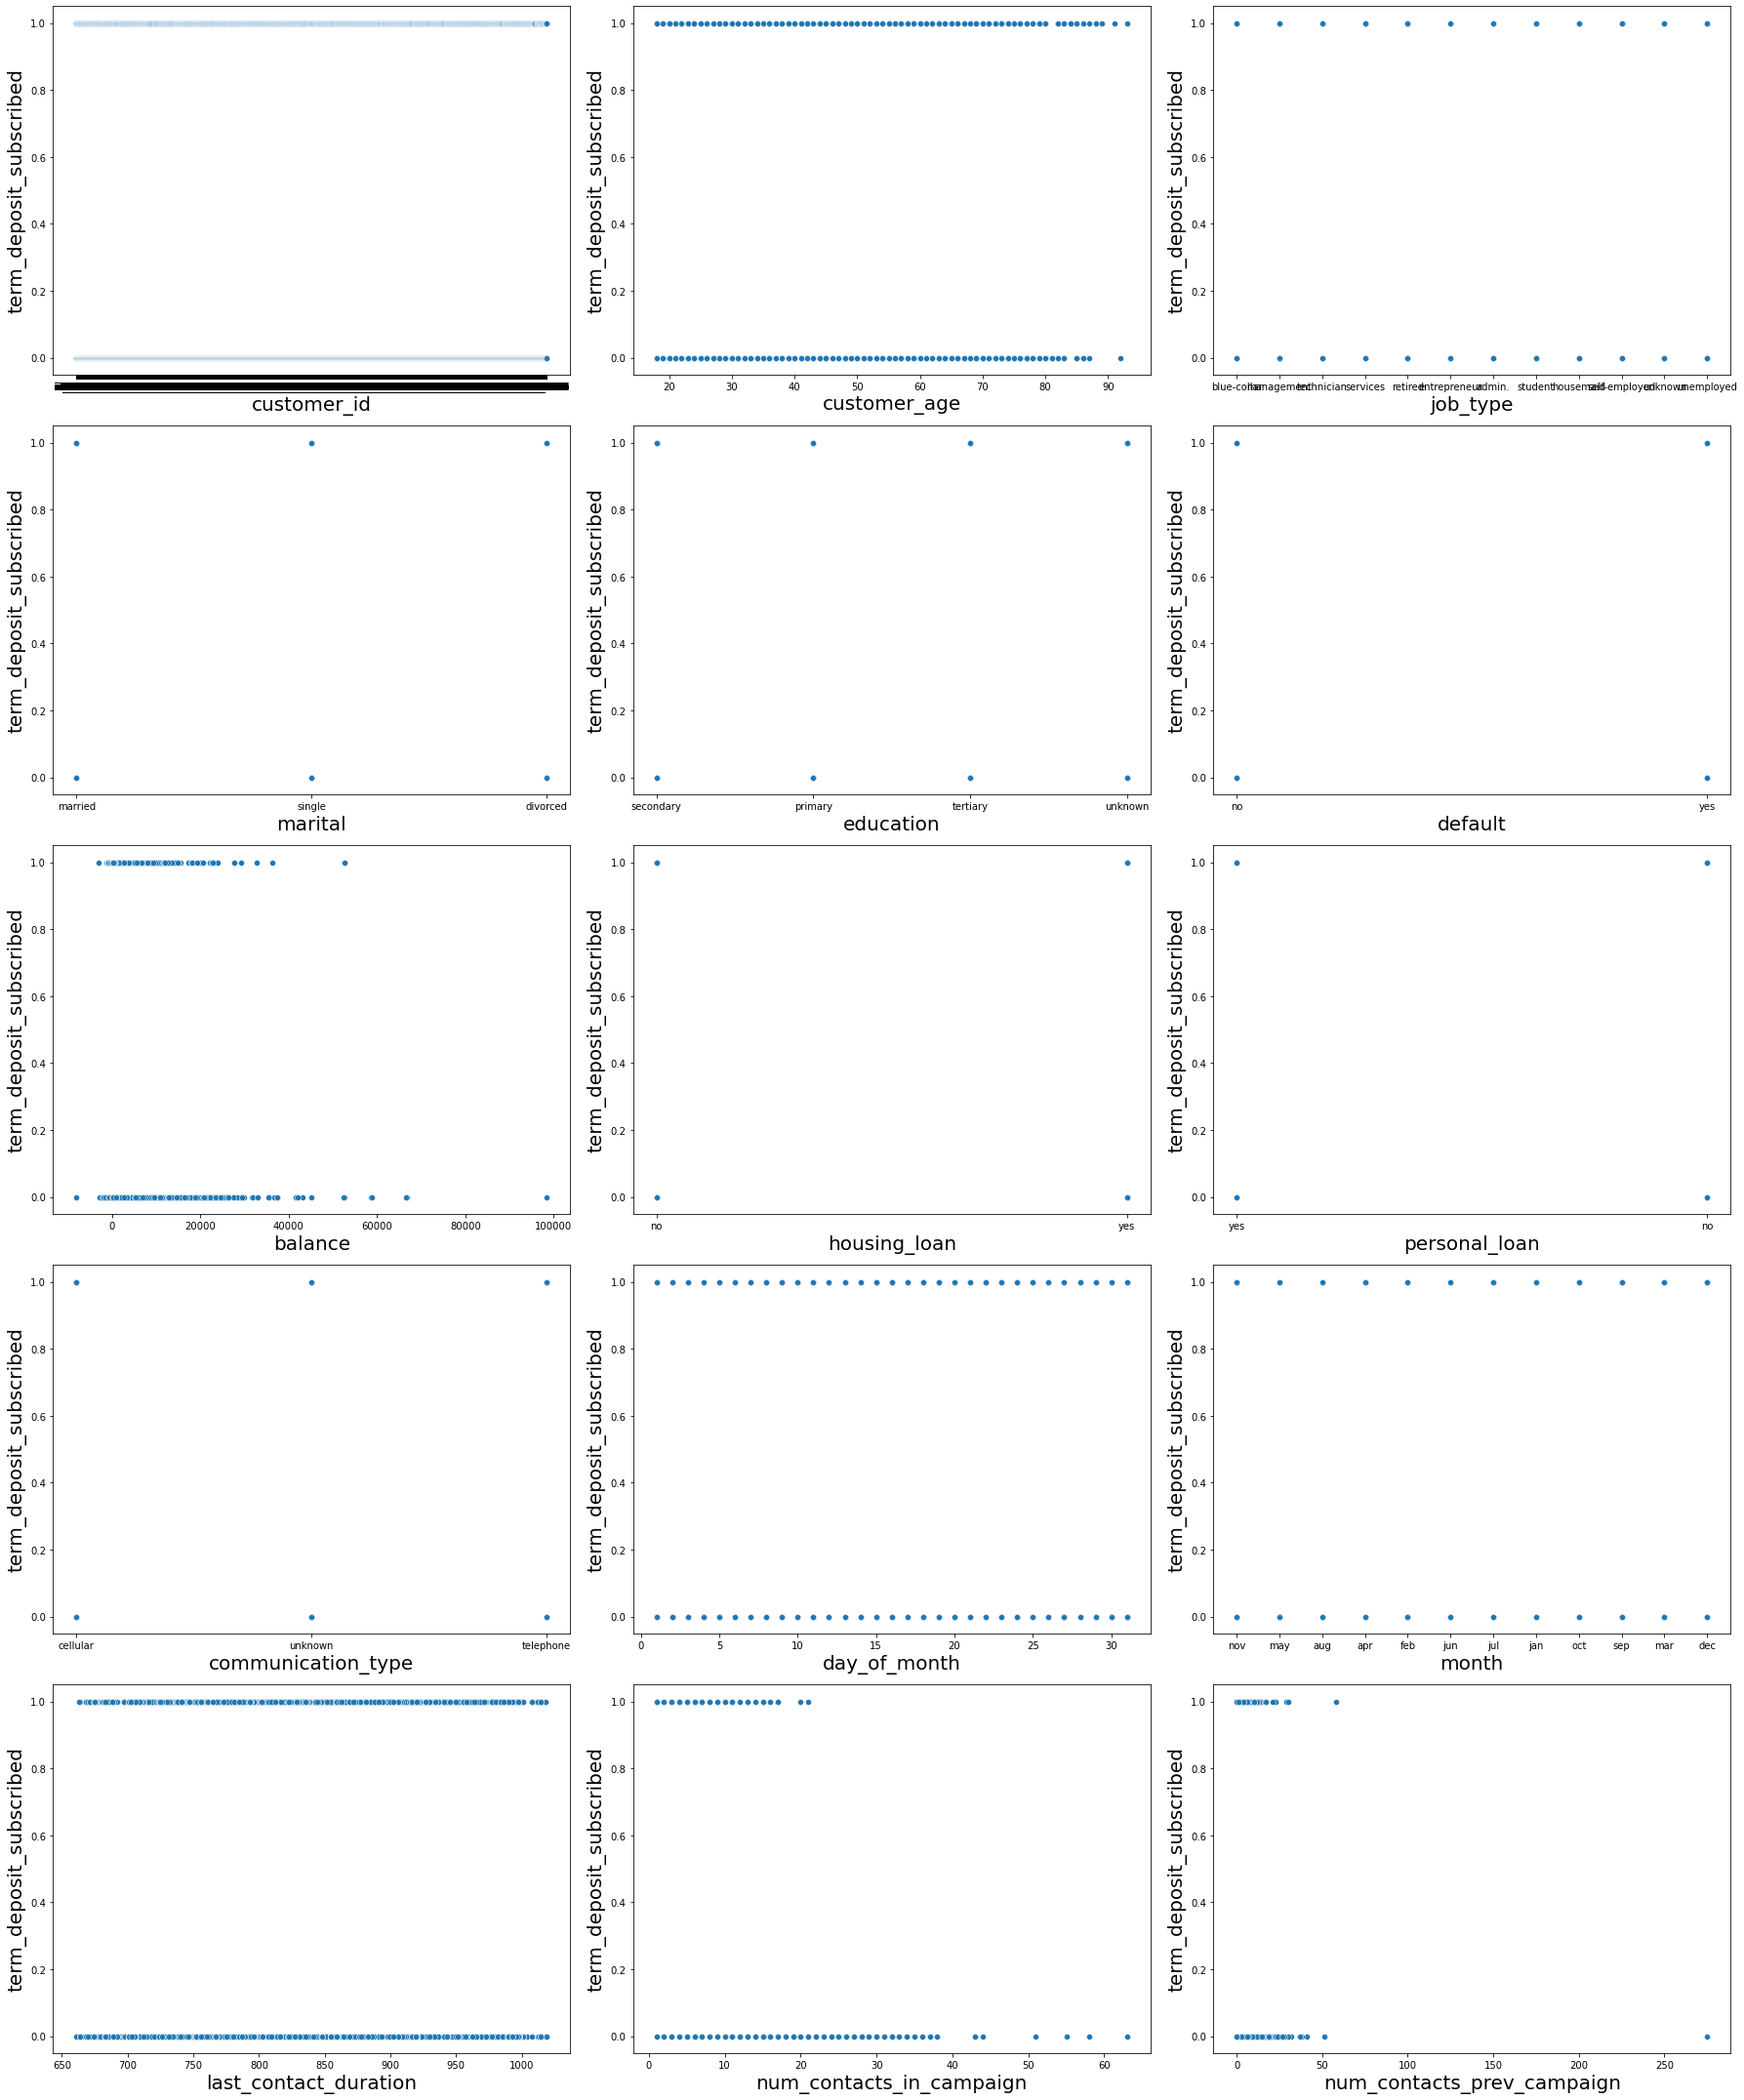

In [25]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber<=15 and column != "term_deposit_subscribed" :
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(x = column,y = "term_deposit_subscribed" , data = data)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("term_deposit_subscribed",fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Observation :- As we see the relationship between the dependent variable(target) and independent variables(features) look separable.

##### 6) Correlation between features

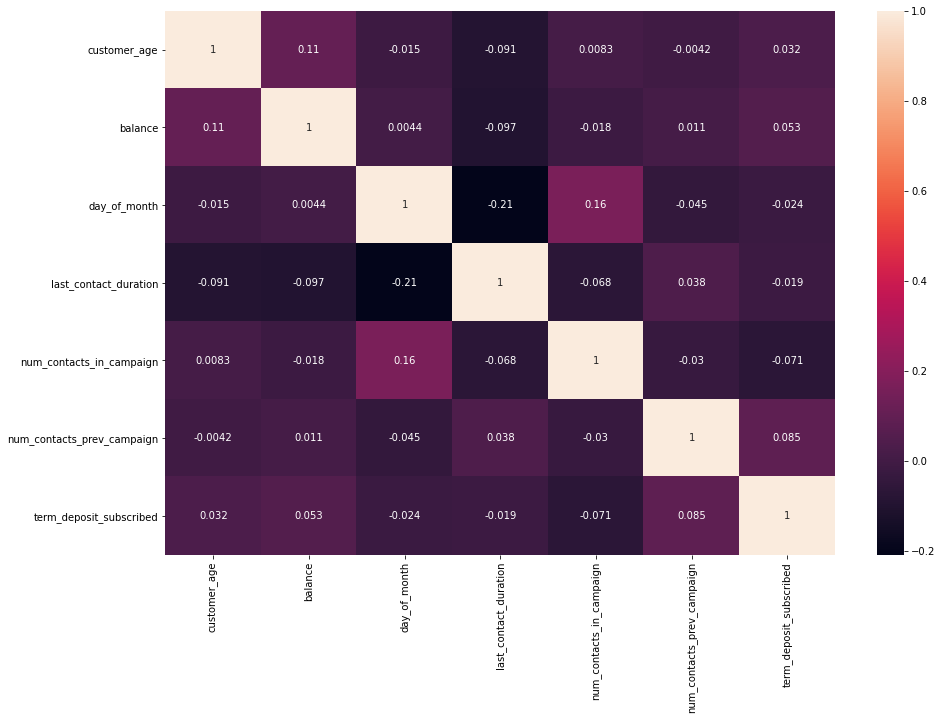

In [26]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data = data.corr(),annot=True)

In [27]:
#correlation value of "term_deposit_subscribed" column with other columns
data.corr()["term_deposit_subscribed"][:-1].sort_values(ascending=False)

num_contacts_prev_campaign    0.084544
balance                       0.052946
customer_age                  0.032112
last_contact_duration        -0.019215
day_of_month                 -0.024477
num_contacts_in_campaign     -0.071203
Name: term_deposit_subscribed, dtype: float64

##### Observation :- As we see all the features are very less correlated with each other therefore multicorrelated does not exists between features.

#### 7) bar graph for categorical features against term_deposit_subscribed to see the co-relation between these columns

In [28]:
categorical = [col for col in data.columns if data[col].dtype == 'O']
categorical

['customer_id',
 'job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

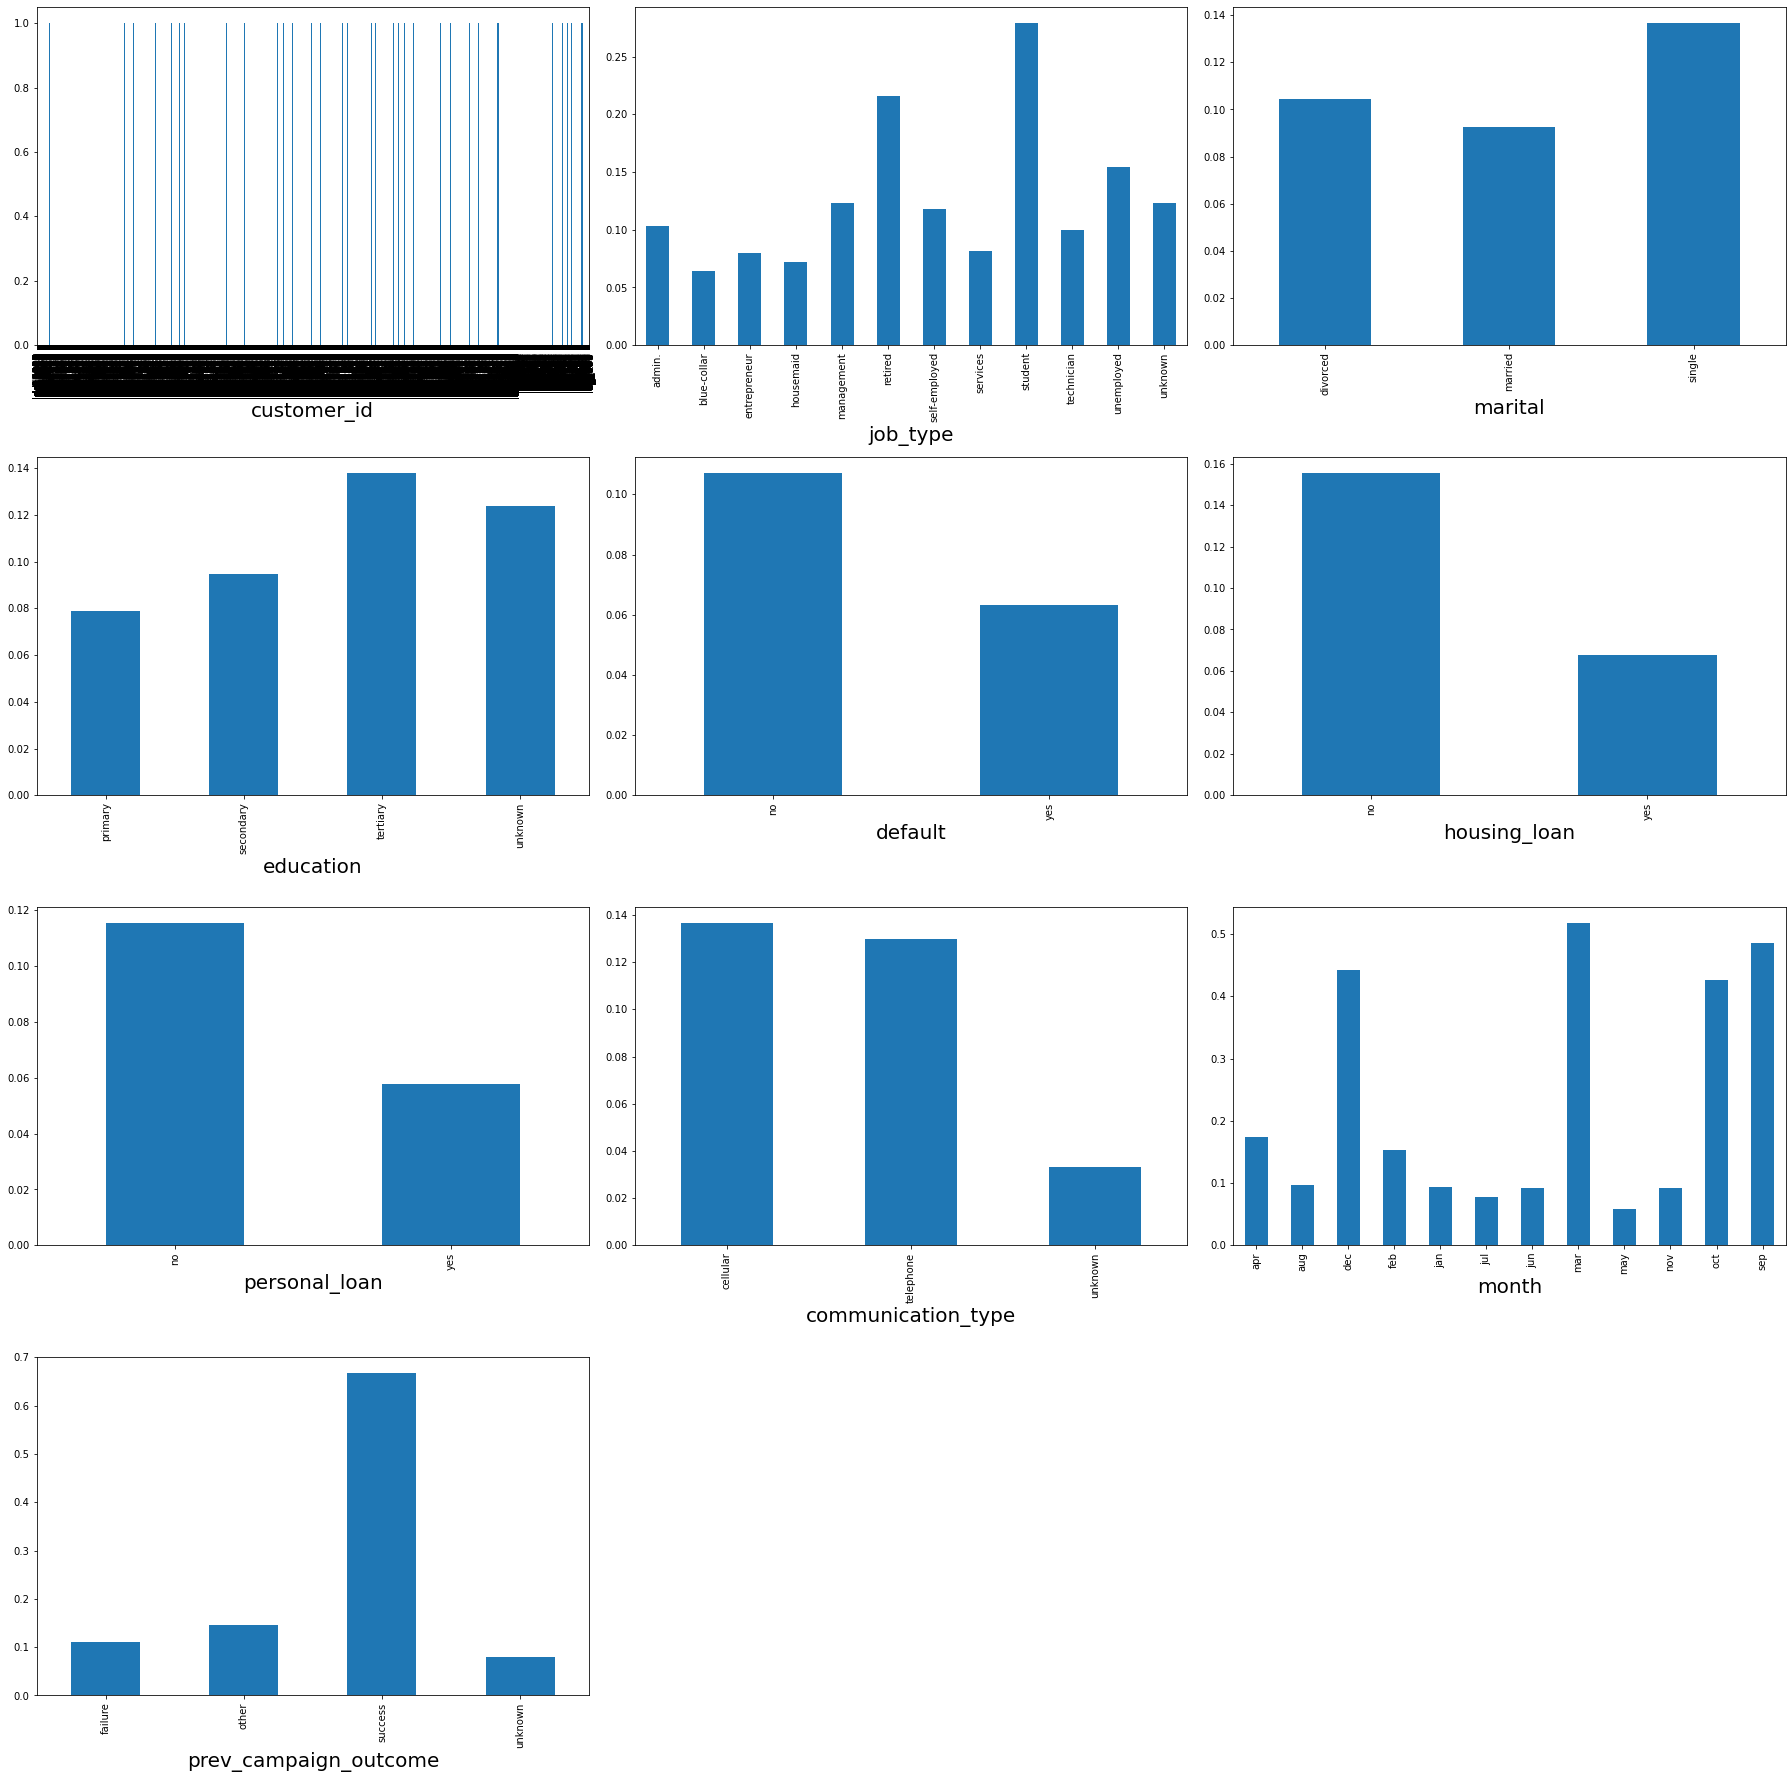

In [29]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in categorical:
    if plotnumber<=10 and column != "term_deposit_subscribed":
        ax = plt.subplot(5,3,plotnumber)
        data.groupby(column).term_deposit_subscribed.mean().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 8) Detect Outliers

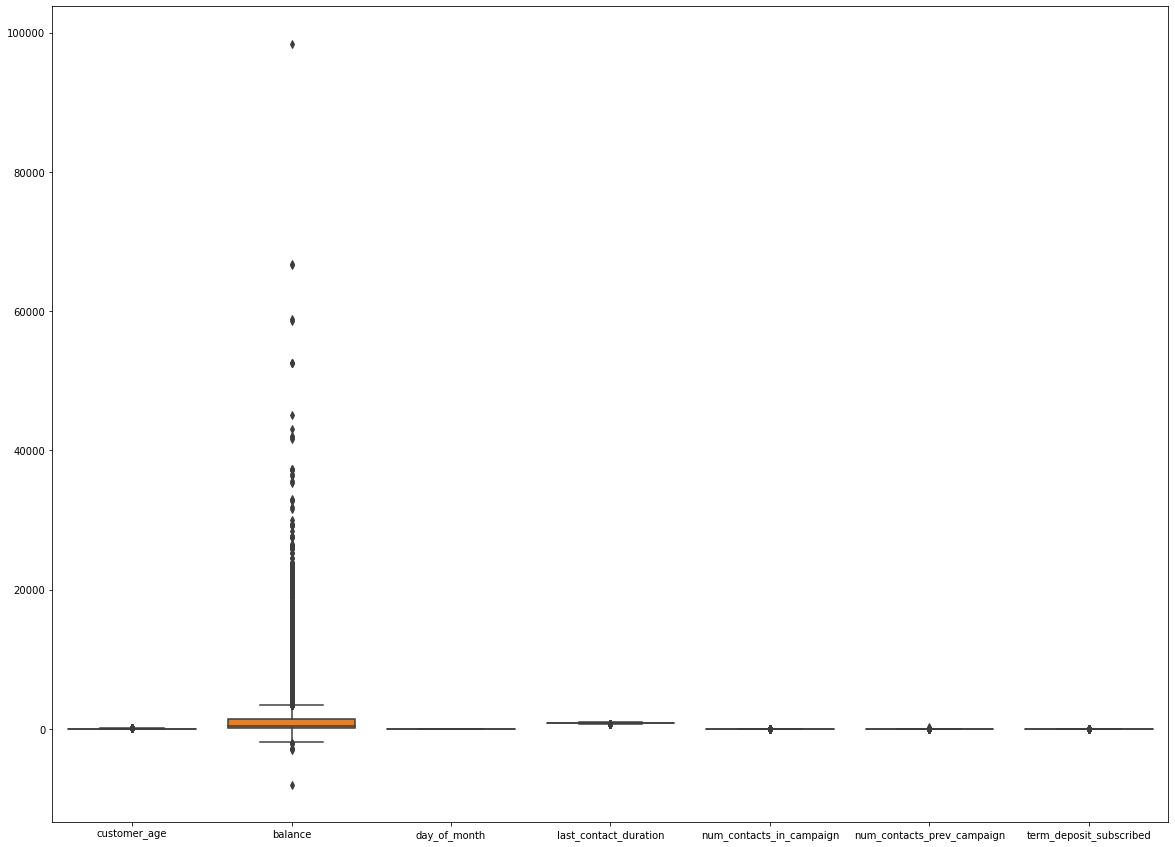

In [30]:
plt.figure(figsize = (20,15),facecolor='white')
sns.boxplot(data = data)
plt.show()

In [31]:
col = [column for column in data.columns if data[column].dtype != 'O']
col

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'term_deposit_subscribed']

In [32]:
for k, v in data[col].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column customer_age outliers = 0.92%
Column balance outliers = 10.59%
Column day_of_month outliers = 0.00%
Column last_contact_duration outliers = 0.22%
Column num_contacts_in_campaign outliers = 9.60%
Column num_contacts_prev_campaign outliers = 100.00%
Column term_deposit_subscribed outliers = 100.00%


## Handling NULL Value

In [33]:
total = data.isnull().sum().sort_values(ascending = False)
percentage = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
df = pd.concat([total , percentage],axis = 1 , keys = ['total','percent'])
df

,total,percent
customer_age,477,1.997487
balance,277,1.159966
personal_loan,113,0.473199
marital,107,0.448074
num_contacts_in_campaign,96,0.402010
housing_loan,0,0.000000
job_type,0,0.000000
education,0,0.000000
default,0,0.000000
term_deposit_subscribed,0,0.000000


#### Heat map for analysis Null Values

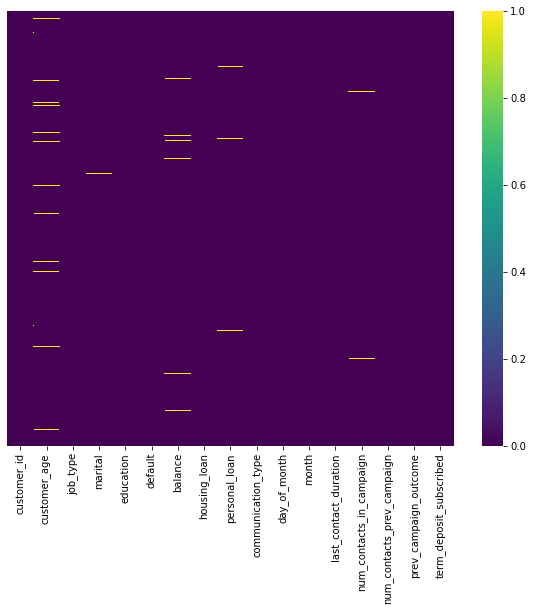

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(data = data.isnull() ,cmap = "viridis" , yticklabels = False )

In [35]:
df_null = data[["customer_age","balance","marital","personal_loan","num_contacts_in_campaign"]]
df_null

,customer_age,balance,marital,personal_loan,num_contacts_in_campaign
0,34.0,934.0,married,yes,2.0
1,41.0,1352.0,married,no,2.0
2,57.0,495.0,married,no,4.0
3,37.0,650.0,married,NaN,1.0
4,29.0,265.0,married,no,2.0
...,...,...,...,...,...
23875,58.0,567.0,married,no,2.0
23876,51.0,1072.0,married,no,7.0
23877,41.0,242.0,married,no,2.0
23878,48.0,2699.0,married,no,6.0


In [36]:
#### mean Imputation method for "customer_age"
data["customer_age"].fillna(data["customer_age"].mean(),inplace = True)

In [37]:
#### mean Imputation method for "balance"
data["balance"].fillna(data["balance"].mean(),inplace = True)

In [38]:
#### mean Imputation method for "num_contacts_in_campaign"
data["num_contacts_in_campaign"].fillna(data["num_contacts_in_campaign"].median(),inplace = True)

In [39]:
#### higest frequency method used for "marital" feature
data["marital"].fillna('unknown',inplace = True)

In [40]:
# higest frequency method used for "personal_loan" feature
data["personal_loan"].fillna(data["personal_loan"].value_counts().index[0],inplace = True)

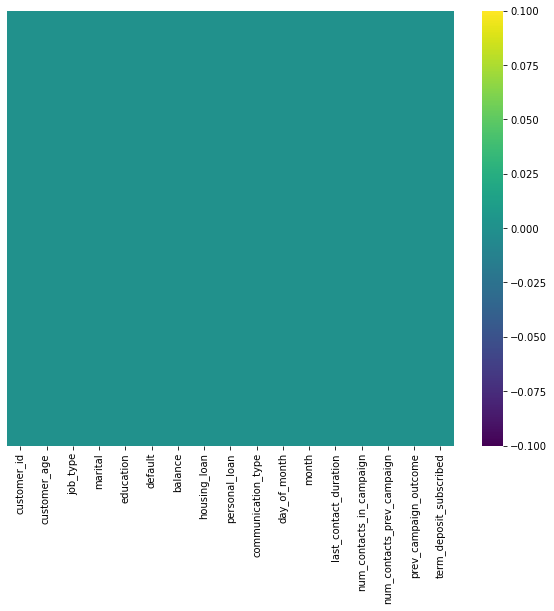

In [41]:
plt.figure(figsize = (10,8))
sns.heatmap(data = data.isnull() ,cmap = "viridis" , yticklabels = False )

## Handling categorical value

In [42]:
# Drop customer_id because we dont need unique identifier
data.drop('customer_id', axis=1, inplace=True)
data.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37.0,management,married,tertiary,no,650.0,yes,no,unknown,26,may,880,1.0,0,unknown,0
4,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [43]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
categorical_features

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [44]:
for x in categorical_features:
    print(x,"================>",data[x].unique())

job_type ================> ['blue-collar' 'management' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
marital ================> ['married' 'single' 'divorced' 'unknown']
education ================> ['secondary' 'primary' 'tertiary' 'unknown']
default ================> ['no' 'yes']
housing_loan ================> ['no' 'yes']
personal_loan ================> ['yes' 'no']
communication_type ================> ['cellular' 'unknown' 'telephone']
month ================> ['nov' 'may' 'aug' 'apr' 'feb' 'jun' 'jul' 'jan' 'oct' 'sep' 'mar' 'dec']
prev_campaign_outcome ================> ['other' 'unknown' 'failure' 'success']


In [45]:
data['marital'].replace({'married': 1 ,'single' : 2 ,'divorced' :3 ,'unknown' : 0}, inplace=True)
data['marital'].astype(int)
data['education'].replace({'secondary':2 ,'primary':1 ,'tertiary':3,'unknown' : 0}, inplace=True)
data['education'].astype(int)
data['default'].replace({'no':0 , 'yes':1}, inplace=True)
data['default'].astype(int)
data['housing_loan'].replace({'no':0 , 'yes':1}, inplace=True)
data['housing_loan'].astype(int)
data['personal_loan'].replace({'no':0 , 'yes':1}, inplace=True)
data['personal_loan'].astype(int)
data['communication_type'].replace({'cellular':1 ,'unknown':0 ,'telephone':2}, inplace=True)
data['communication_type'].astype(int)
data['prev_campaign_outcome'].replace({'other':3,'unknown':0,'failure':1 ,'success':2}, inplace=True)
data['prev_campaign_outcome'].astype(int)
data['month'].replace({'nov':10 ,'may':4 ,'aug':7 ,'apr':3 ,'feb':1 ,'jun':5 ,'jul':6 ,'jan':0 ,'oct':9 ,'sep':8 ,'mar':2 ,'dec':11}, inplace=True)
data['month'].astype(int)
data['job_type'].replace({'blue-collar':11,'management':10,'technician':9,'services':8,'retired':7,'entrepreneur':6,'admin.':5,'student':4,'housemaid':3,'self-employed':2,'unknown':0,'unemployed':1}, inplace=True)
data['job_type'].astype(int)

0        11
1        11
2        11
3        10
4         9
         ..
23875     5
23876    10
23877     1
23878     8
23879     9
Name: job_type, Length: 23880, dtype: int32

In [46]:
data.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,11,1,2,0,934.0,0,1,1,18,10,704,2.0,1,3,0
1,41.0,11,1,1,0,1352.0,1,0,1,13,4,893,2.0,0,0,0
2,57.0,11,1,1,0,495.0,0,0,1,18,7,796,4.0,0,0,1
3,37.0,10,1,3,0,650.0,1,0,0,26,4,880,1.0,0,0,0
4,29.0,9,1,2,0,265.0,1,0,1,19,7,795,2.0,0,0,0


In [47]:
data.to_csv('without_imbalanced_dataset.csv')

## Imbalanced Data Handling

In [54]:
from imblearn.over_sampling import RandomOverSampler

tl = RandomOverSampler(random_state=42)

In [55]:
# fit predictor and target variable
X,y = tl.fit_resample(data[[x for x in data.columns.to_list() if x != 'term_deposit_subscribed']],data['term_deposit_subscribed'])

In [56]:
#### Combine X,y to Dataframe for further processing
def ConvertToDf(X,y, x_cols=[], y_cols=''):
    dfs = pd.DataFrame(data = X, columns = x_cols)
    dfs_1 = pd.DataFrame(data=y, columns=[y_cols])
    return pd.concat([dfs, dfs_1], axis=1)

x_cols = [x for x in data.columns.to_list() if x != 'term_deposit_subscribed']
y_cols = 'term_deposit_subscribed'

In [57]:
newdata = ConvertToDf(X, y, x_cols, y_cols)

In [58]:
newdata.shape

(42688, 16)

In [59]:
newdata.term_deposit_subscribed.value_counts()

1    21344
0    21344
Name: term_deposit_subscribed, dtype: int64

In [60]:
newdata.to_csv('preprocessed.csv')